# Project description
---
> ## Project Objective
Analysis and creation of machine learning models using disease symptom data.

> ## Background
The creation of machine learning models for symptom-based disease detection is to improve fast and accurate medical diagnosis.

> ## Data utilized
The data used is public data shared by Laksika Tharmalingam which is distributed via kaggle.
Here is the source of the dataset:
https://www.kaggle.com/datasets/uom190346a/disease-symptoms-and-patient-profile-dataset

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import joblib
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Dataset

In [ ]:
df = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


## Dataset Information

Disease: The name of the disease or medical condition.
<hr>
Fever: Indicates whether the patient has a fever (Yes/No).
<hr>
Cough: Indicates whether the patient has a cough (Yes/No).
<hr>
Fatigue: Indicates whether the patient experiences fatigue (Yes/No).
<hr>
Difficulty Breathing: Indicates whether the patient has difficulty breathing (Yes/No).
<hr>
Age: The age of the patient in years.
<hr>
Gender: The gender of the patient (Male/Female).
<hr>
Blood Pressure: The blood pressure level of the patient (Normal/High).
<hr>
Cholesterol Level: The cholesterol level of the patient (Normal/High).
<hr>
Outcome Variable: The outcome variable indicating the result of the diagnosis or assessment for the specific disease (Positive/Negative).

In [ ]:
df.shape

(349, 10)

This dataset has 349 rows and 10 columns

In [ ]:
df.rename(columns={
    'Difficulty Breathing'	: 'DB',
    'Blood Pressure' : 'BP',
    'Cholesterol Level' : 'CL',
    'Outcome Variable' : 'Results'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Disease  349 non-null    object
 1   Fever    349 non-null    object
 2   Cough    349 non-null    object
 3   Fatigue  349 non-null    object
 4   DB       349 non-null    object
 5   Age      349 non-null    int64 
 6   Gender   349 non-null    object
 7   BP       349 non-null    object
 8   CL       349 non-null    object
 9   Results  349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [ ]:
# df.where(df['Results'] != 'Negative').info()
# df[df['Results'] == "Positive"].info()
df['Results'].value_counts()

Positive    186
Negative    163
Name: Results, dtype: int64

in results has 2 types of values, namely positive and negative with values 186 and 163. We don't need the negative value so we can remove it before exploring the data.

In [ ]:
df = df.loc[df['Results'] == "Positive"]
df

,Disease,Fever,Cough,Fatigue,DB,Age,Gender,BP,CL,Results
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


# Exploratory Data Analysis

In [ ]:
df.groupby(pd.Grouper(key='Gender')).mean()

<ipython-input-8-53a02b1dce77>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(pd.Grouper(key='Gender')).mean()


,Age
Gender,
Female,48.518868
Male,44.937500


The average age of patients in this dataset is 45 for male and 46 for women.

([<matplotlib.patches.Wedge at 0x7929890010f0>,
 [Text(-0.20319867250245546, 1.081069053989263, 'High'),
  Text(0.12975236797197015, -1.0923206136504366, 'Normal'),
  Text(1.0974904718072545, -0.0742607856966934, 'Low')],
 [Text(-0.11083563954679387, 0.5896740294486889, '55.9%'),
  Text(0.07077401889380189, -0.595811243809329, '41.9%'),
  Text(0.5986311664403206, -0.0405058831072873, '2.2%')])

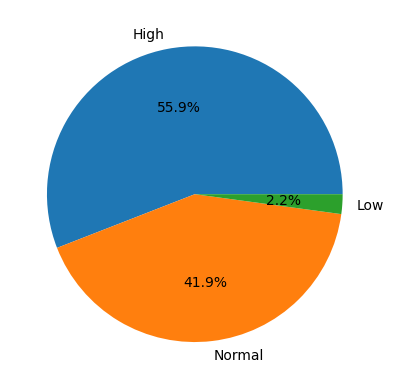

In [ ]:
plt.pie(df["BP"].value_counts().values,labels=df["BP"].value_counts().index,autopct="%1.1f%%")

The plot above illustrates the percentage of blood pressure in the dataset based on 3 values: high, medium and low.

([<matplotlib.patches.Wedge at 0x7929890d5600>,
 [Text(-0.3994032666438247, 1.0249278172604361, 'High'),
  Text(0.22142836558905946, -1.0774829367152678, 'Normal'),
  Text(1.0843467656780428, -0.18491103743034945, 'Low')],
 [Text(-0.21785632726026802, 0.5590515366875106, '61.83%'),
  Text(0.12077910850312333, -0.5877179654810551, '32.80%'),
  Text(0.5914618721880233, -0.10086056587109969, '5.38%')])

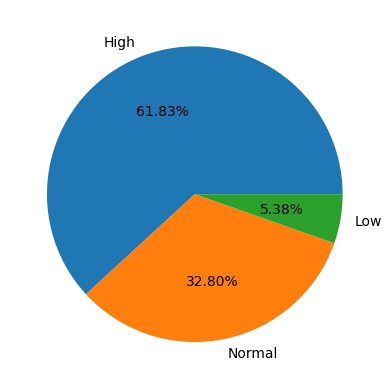

In [ ]:
plt.pie(df["CL"].value_counts().values,labels=df["CL"].value_counts().index,autopct="%1.2f%%")

The plot above illustrates the percentage of Cholesterole in the dataset based on 3 values: high, medium and low.

<Axes: >

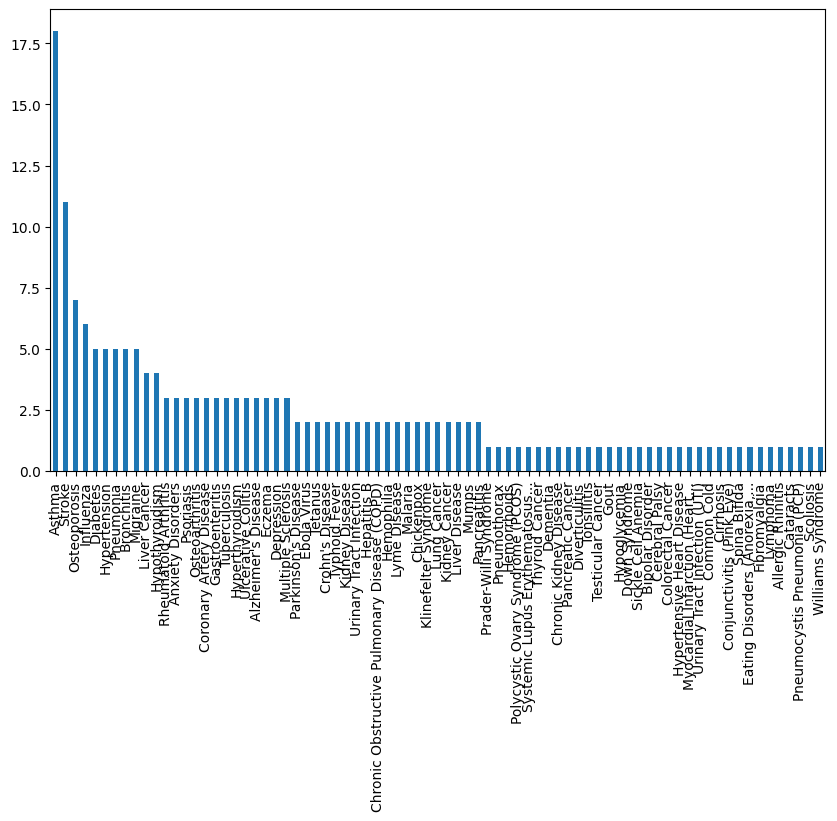

In [ ]:
plt.figure(figsize=(10, 6))
df['Disease'].value_counts().plot(kind='bar')

because many labels only have 1 row of data, we should only filter data that has more than 2 labels.

<Axes: >

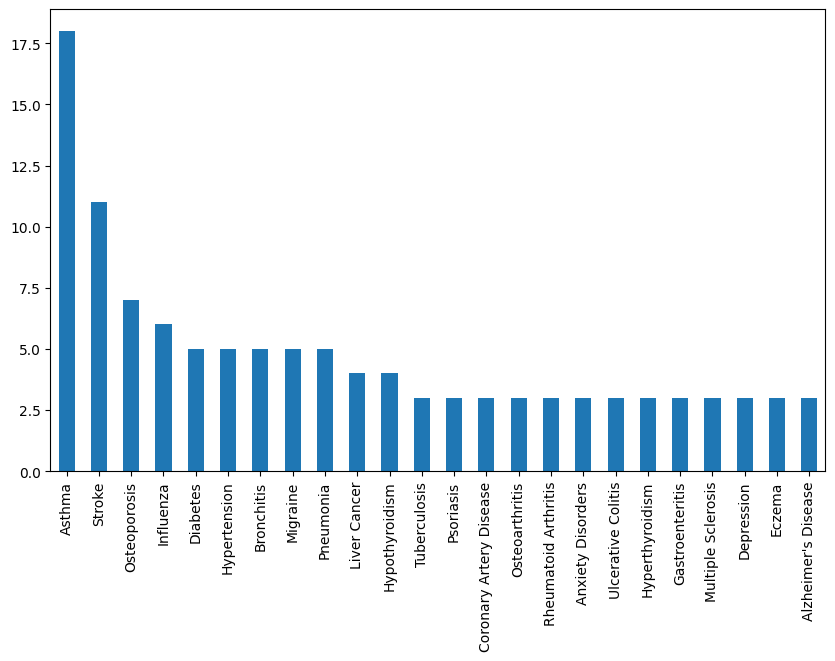

In [ ]:
disease = df['Disease'].value_counts()
value = disease[disease > 2]
df_filtered = df[df['Disease'].isin(value.index)]
plt.figure(figsize=(10, 6))
df_filtered['Disease'].value_counts().plot(kind='bar')

In [ ]:
df_filtered

,Disease,Fever,Cough,Fatigue,DB,Age,Gender,BP,CL,Results
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


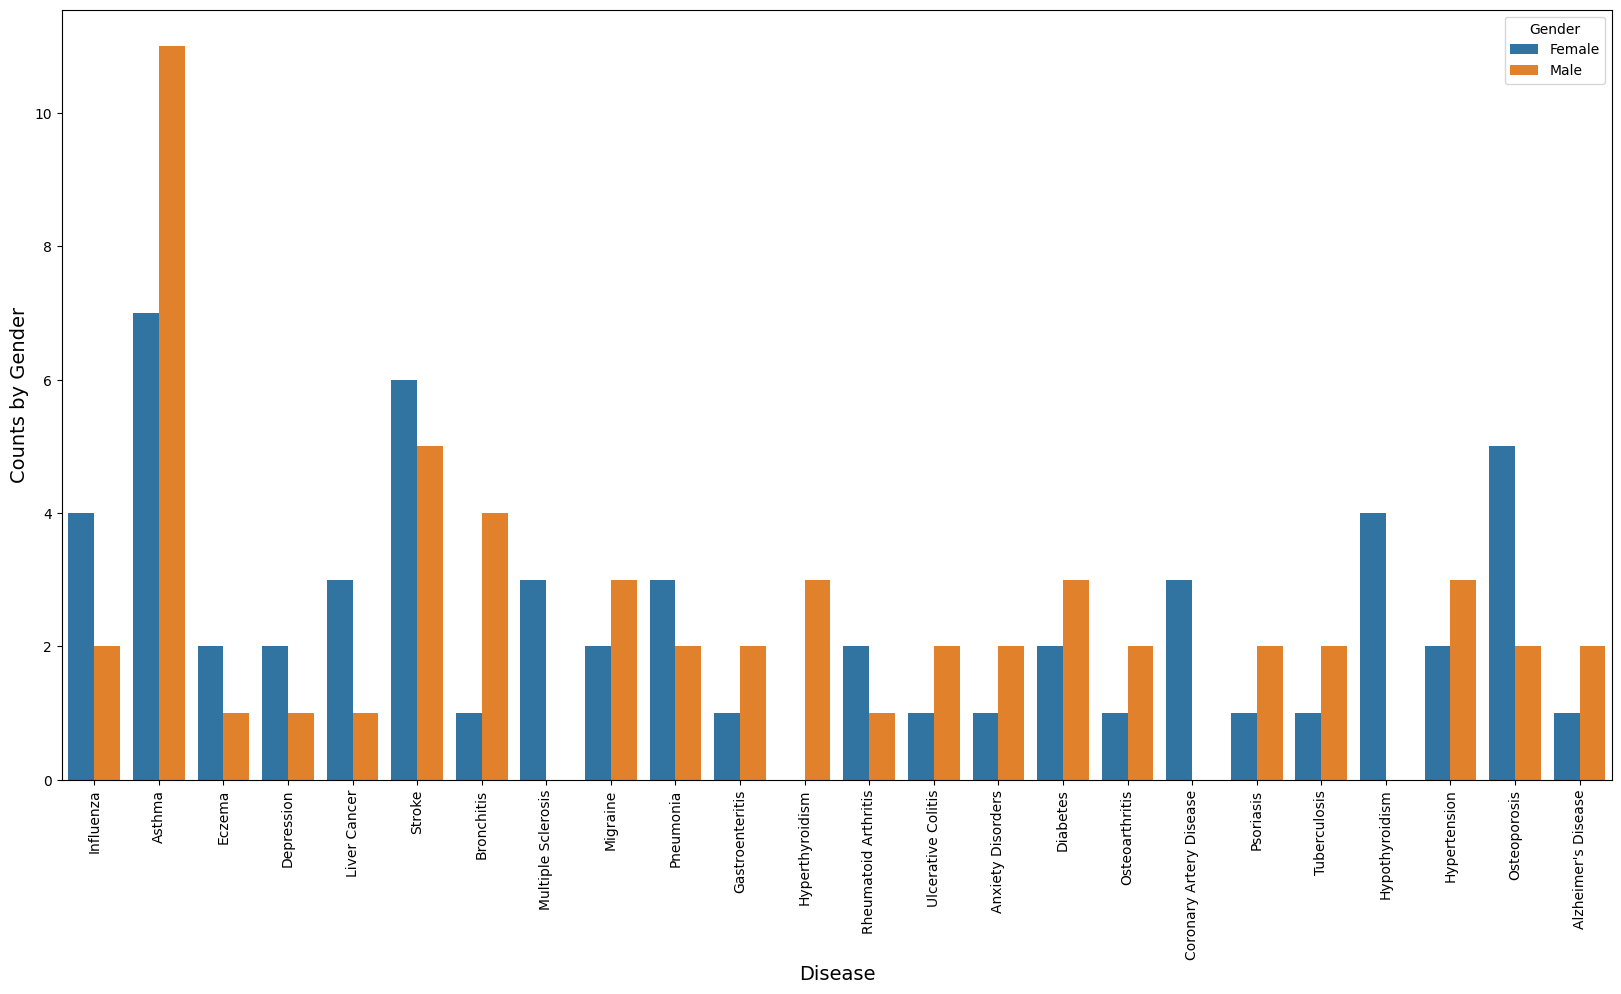

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x = df_filtered['Disease'],hue = df_filtered['Gender'])
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Disease', fontsize=14)
plt.ylabel('Counts by Gender', fontsize=14)
plt.show()

From the bar visualization above, we can see that the most common disease suffered by men and women is asthma.

because the result column only has 1 value category which is positive, then we don't need that column anymore and we should delete it first.

In [ ]:
df = df_filtered.drop(columns=['Results'], axis=1)
df

,Disease,Fever,Cough,Fatigue,DB,Age,Gender,BP,CL
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal
...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High
345,Stroke,Yes,No,Yes,No,85,Male,High,High
346,Stroke,Yes,No,Yes,No,85,Male,High,High
347,Stroke,Yes,No,Yes,No,90,Female,High,High


# Preprocessing

The first preprocessing is to convert the category values (all columns) into numeric values. This needs to be done because the machine learning modeling process requires numeric values, not categories. Here I create 2 labelencoder objects because it makes it easier to export objects on the change of y value (label).

## Label Encoder

In [ ]:
le = LabelEncoder()
for i in ['Fever','Cough','Fatigue','DB','BP','CL','Gender']:
    df[i] = le.fit_transform(df[i])

le_target = LabelEncoder()
df['Disease'] = le_target.fit_transform(df['Disease'])

In [ ]:
df

,Disease,Fever,Cough,Fatigue,DB,Age,Gender,BP,CL
0,12,1,0,1,1,19,0,1,2
3,2,1,1,0,1,25,1,2,2
4,2,1,1,0,1,25,1,2,2
5,7,1,0,0,0,25,0,2,2
6,12,1,1,1,1,25,0,2,2
...,...,...,...,...,...,...,...,...,...
344,21,1,0,1,0,80,0,0,0
345,21,1,0,1,0,85,1,0,0
346,21,1,0,1,0,85,1,0,0
347,21,1,0,1,0,90,0,0,0


The next preprocessing is scaling the age column, the age column has a fairly high range of values so to speed up the process of making machine learning models, it should be reduced using a certain method, for example I use minmax scaler from sklearn.

## MinMax Scaler

In [ ]:
min_max = MinMaxScaler()
df['Age'] = min_max.fit_transform(df[['Age']])

df

,Disease,Fever,Cough,Fatigue,DB,Age,Gender,BP,CL
0,12,1,0,1,1,0.000000,0,1,2
3,2,1,1,0,1,0.084507,1,2,2
4,2,1,1,0,1,0.084507,1,2,2
5,7,1,0,0,0,0.084507,0,2,2
6,12,1,1,1,1,0.084507,0,2,2
...,...,...,...,...,...,...,...,...,...
344,21,1,0,1,0,0.859155,0,0,0
345,21,1,0,1,0,0.929577,1,0,0
346,21,1,0,1,0,0.929577,1,0,0
347,21,1,0,1,0,1.000000,0,0,0


## Smote

In [ ]:
X = df.drop(['Disease'], axis= 1)
y = df.Disease

In [ ]:
smote = SMOTE(sampling_strategy='auto', k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Disease')], axis=1)
df_resampled['Disease_category'] = le_target.inverse_transform(df_resampled['Disease'])

<Axes: >

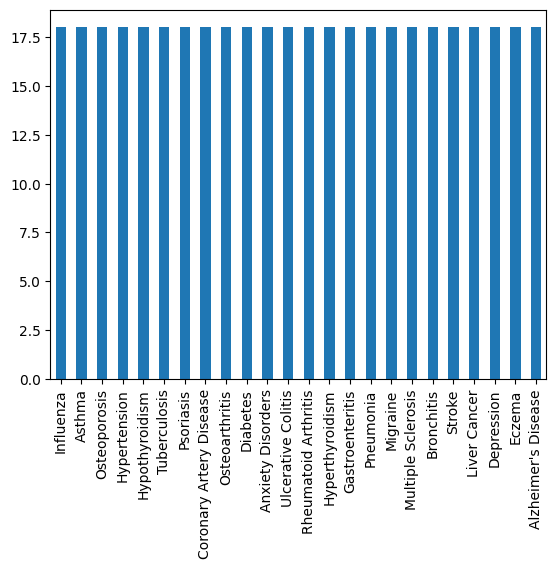

In [ ]:
df_resampled['Disease_category'].value_counts().plot(kind='bar')

Because it uses smote, the labels or targets have the same quantity as each other.

# Modeling

## Split Data
Train: 40 %
Test: 60 %

In [ ]:
X = df_resampled.drop(['Disease', 'Disease_category'], axis= 1).values
y = df_resampled.Disease.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4, random_state=42)

## Train Model
There are several models that will be tested in this project, it's:


*   RandomForestClassifier
*   SVC
*   KNeighborsClassifier
*   MultinomialNB
*   DecisionTreeClassifier



In [ ]:
models = [
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('K-NN', KNeighborsClassifier()),
    ('Multinomial NB', MultinomialNB()),
    ('Decision Tree', DecisionTreeClassifier())
]

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name}: Accuracy = {accuracy:.2f}")

Random Forest: Accuracy = 0.65
SVM: Accuracy = 0.51
K-NN: Accuracy = 0.61
Multinomial NB: Accuracy = 0.34
Decision Tree: Accuracy = 0.62


From the accuracy results above, the highest is RandomForestClassifier so we will use the model on this dataset. However, we need to re-tune the RandomForestClassifier model to optimize it using GridsearchCV.

## hyperparameter Tuning

In [ ]:
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Lakukan pencarian parameter terbaik
grid_search.fit(X_train, y_train)

# Cetak parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Parameter terbaik: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi RandomForest : {accuracy}")

Akurasi RandomForest : 0.6473988439306358


## Evaluation

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.55      0.75      0.63         8
           2       0.67      0.67      0.67         6
           3       0.86      0.75      0.80         8
           4       0.25      0.50      0.33         4
           5       0.71      0.56      0.63         9
           6       0.67      0.67      0.67         9
           7       0.80      0.50      0.62         8
           8       0.33      0.17      0.22         6
           9       0.75      0.75      0.75         4
          10       0.56      1.00      0.71         5
          11       0.67      0.67      0.67         6
          12       1.00      0.30      0.46        10
          13       0.25      0.22      0.24         9
          14       0.75      0.60      0.67         5
          15       0.86      0.86      0.86         7
          16       0.50      0.60      0.55         5
          17       0.75    

## Testing

In [ ]:
import pandas as pd

X_test_df = pd.DataFrame(X_test)
df = pd.DataFrame({'actual': le_target.inverse_transform(y_test), 'predicted': le_target.inverse_transform(y_pred)})
df = df.set_index(X_test_df.index)
df = pd.concat([X_test_df, df], axis=1)
misclassified = df[df['actual'] == df['predicted']]

misclassified

,0,1,2,3,4,5,6,7,actual,predicted
0,0.0,0.0,1.0,0.0,0.306702,0.0,0.0,0.0,Ulcerative Colitis,Ulcerative Colitis
2,0.0,0.0,1.0,0.0,0.360415,0.0,0.0,0.0,Depression,Depression
6,1.0,1.0,1.0,1.0,0.295775,1.0,0.0,0.0,Tuberculosis,Tuberculosis
7,1.0,0.0,1.0,1.0,0.583752,1.0,0.0,0.0,Bronchitis,Bronchitis
8,1.0,0.0,1.0,0.0,0.318439,0.0,0.0,0.0,Diabetes,Diabetes
...,...,...,...,...,...,...,...,...,...,...
166,1.0,0.0,0.0,0.0,0.366197,0.0,0.0,0.0,Multiple Sclerosis,Multiple Sclerosis
167,0.0,0.0,1.0,0.0,0.252823,0.0,1.0,0.0,Depression,Depression
168,1.0,1.0,1.0,1.0,0.295775,1.0,0.0,0.0,Tuberculosis,Tuberculosis
171,1.0,0.0,1.0,0.0,0.929577,1.0,0.0,0.0,Stroke,Stroke


# Export

In [ ]:
joblib.dump(best_rf, 'API/Machine-learning/model.pkl')
joblib.dump(le, 'API/Machine-learning/label_enc.pkl')
joblib.dump(le_target, 'API/Machine-learning/label_enc_target.pkl')
joblib.dump(min_max, 'API/Machine-learning/min_max.pkl')

['min_max.pkl']